# Analysis of results

Packages

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

BASE_DIR = Path(os.path.abspath(''))
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## Functions

## Masking by *k* known antibiotics, *k* = 1 (60% genotypes masked)

In [2]:
results_easyPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_easyPT_mask_0.6_1known', 'results.pkl'))
results_mediumPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_mediumPT_mask_0.6_1known', 'results.pkl'))
results_hardPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_hardPT_mask_0.6_1known', 'results.pkl'))
results_naive = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_0.6_1known', 'results.pkl'))

In [3]:
results_easyPT.keys()

dict_keys(['train_time', 'best_epoch', 'train_losses', 'val_losses', 'val_accs', 'val_iso_accs', 'val_iso_stats', 'val_ab_stats'])

### General results

Compare loss, as well as top-level averages of accuracy, isolate accuracy, sensitivity, F1 etc. at best epoch

In [5]:
best_epoch = results_easyPT['best_epoch']
train_loss = results_easyPT['train_losses'][best_epoch]
val_loss = results_easyPT['val_losses'][best_epoch]
val_acc = results_easyPT['val_accs'][best_epoch]
val_iso_acc = results_easyPT['val_iso_accs'][best_epoch]

print(f'Best epoch: {best_epoch}')
print(f'Train loss: {train_loss:.3f}')
print(f'Val loss: {val_loss:.3f}')
print(f'Val accuracy: {val_acc:.3f}')
print(f'Val iso accuracy: {val_iso_acc:.3f}')
print(results_easyPT['val_losses'])

Best epoch: 10
Train loss: 0.145
Val loss: 0.143
Val accuracy: 0.946
Val iso accuracy: 0.946
[tensor(0.2170, device='cuda:0'), tensor(0.1866, device='cuda:0'), tensor(0.1884, device='cuda:0'), tensor(0.1741, device='cuda:0'), tensor(0.1660, device='cuda:0'), tensor(0.1659, device='cuda:0'), tensor(0.1595, device='cuda:0'), tensor(0.1497, device='cuda:0'), tensor(0.1575, device='cuda:0'), tensor(0.1495, device='cuda:0'), tensor(0.1427, device='cuda:0'), tensor(0.1532, device='cuda:0'), tensor(0.1434, device='cuda:0'), tensor(0.1494, device='cuda:0'), tensor(0.1452, device='cuda:0'), tensor(0.1608, device='cuda:0'), tensor(0.1502, device='cuda:0'), tensor(0.1452, device='cuda:0'), tensor(0.1458, device='cuda:0'), tensor(0.1538, device='cuda:0'), tensor(0.1448, device='cuda:0')]


In [8]:
iso_stats = results_easyPT['val_iso_stats']
iso_stats['num_masked'].describe()

count    1610.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: num_masked, dtype: float64

### Antibiotic-level results

#### Accuracy 

Pre-trained model

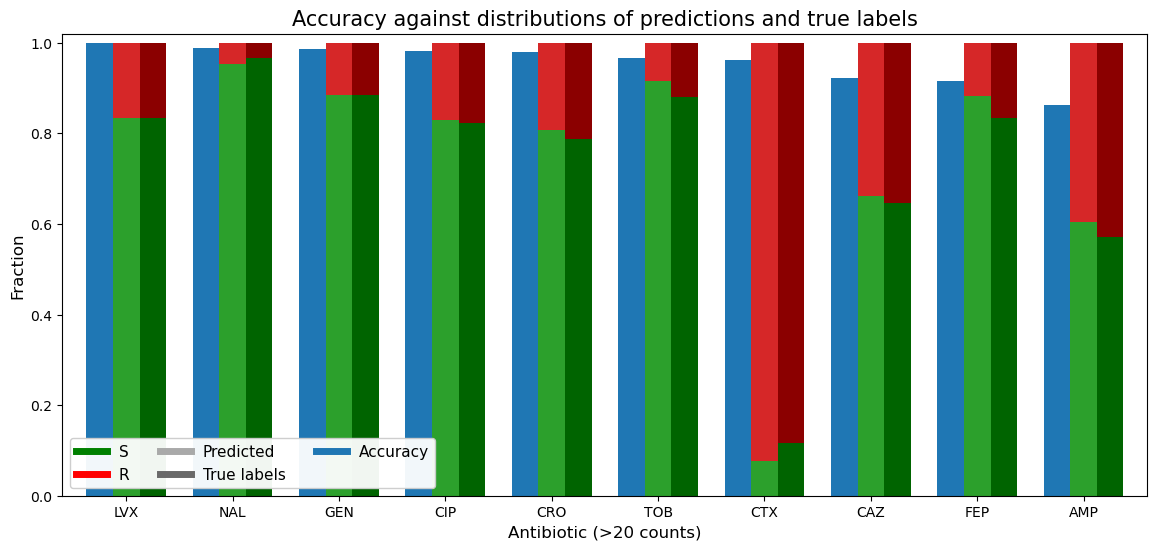

In [52]:
ab_stats = results_balancedPT['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Naive model

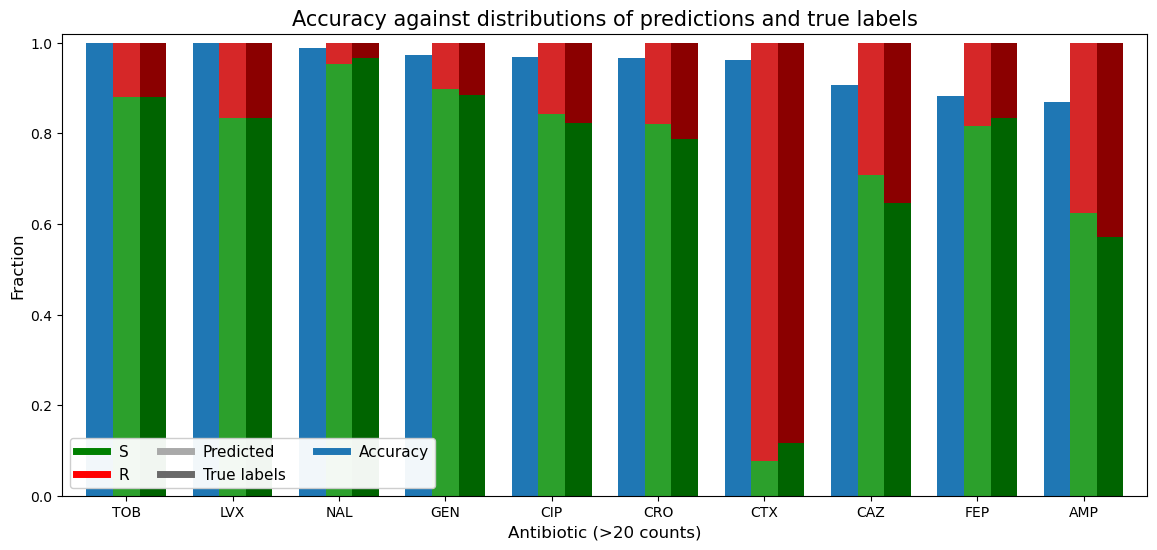

In [53]:
ab_stats = results_naive['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Compare naive and pre-trained

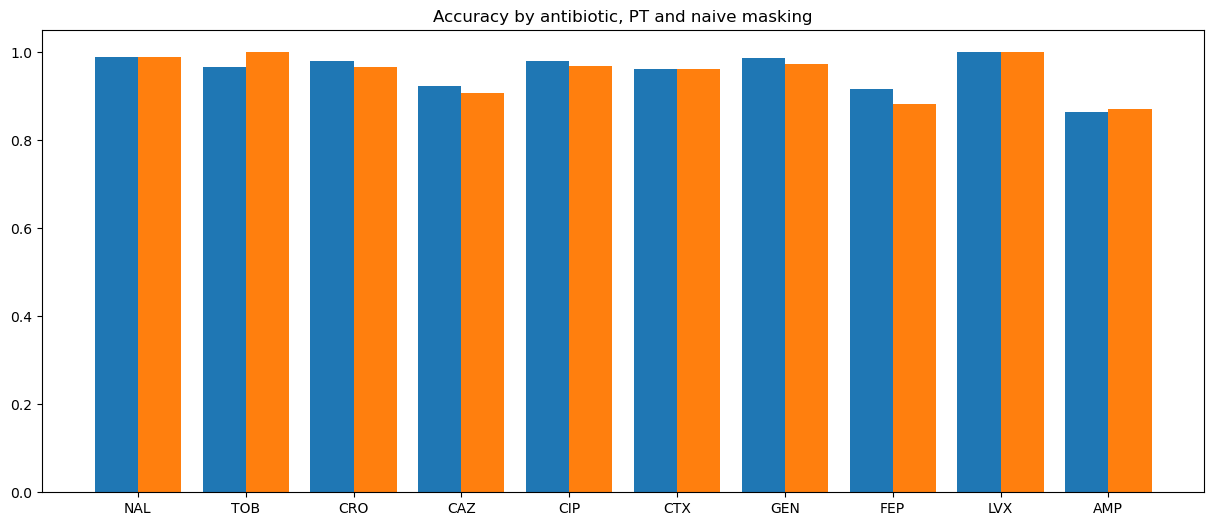

In [60]:
ab_stats_pt = results_balancedPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(ab_stats_pt.index, ab_stats_pt['accuracy'], color='tab:blue', width=-0.4, align='edge', label='Accuracy')
ax.bar(ab_stats_naive.index, ab_stats_naive['accuracy'], color='tab:orange', width=0.4, align='edge', label='Count')
ax.set_title('Accuracy by antibiotic, PT and naive masking')
plt.show()

## Random masking - 60% geno, 80% pheno

In [92]:
results_hardPT = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_hardPT_mask_probs_0.6_0.8', 'ft_results.pkl'))
results_naive = pd.read_pickle(os.path.join(BASE_DIR, 'results', 'MM', 'FT_naive_mask_probs_0.6_0.8', 'ft_results.pkl'))

#### Accuracy

Pre-trained model

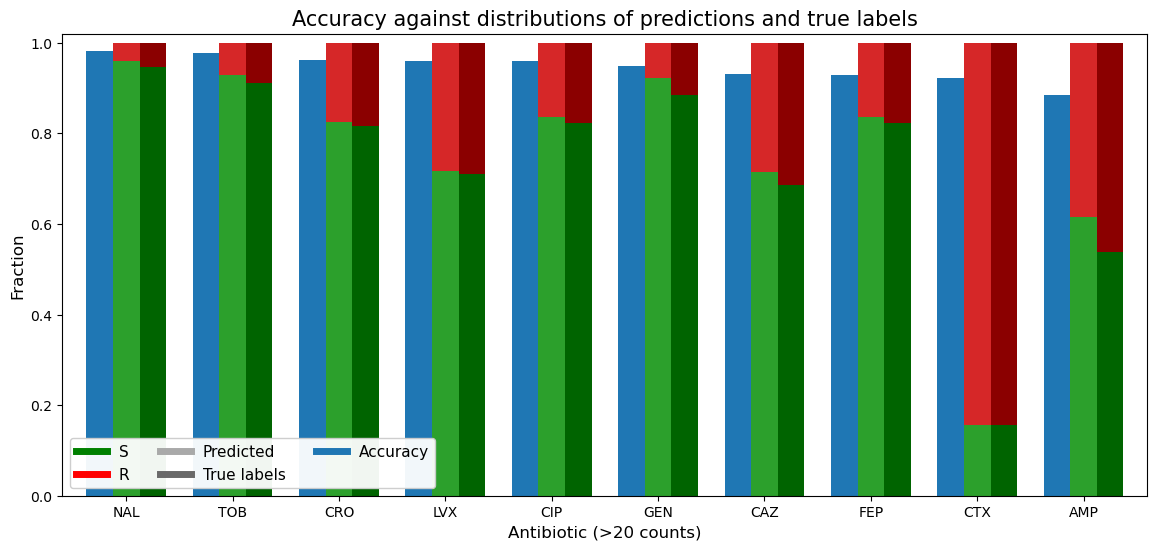

In [93]:
ab_stats = results_hardPT['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Naive model

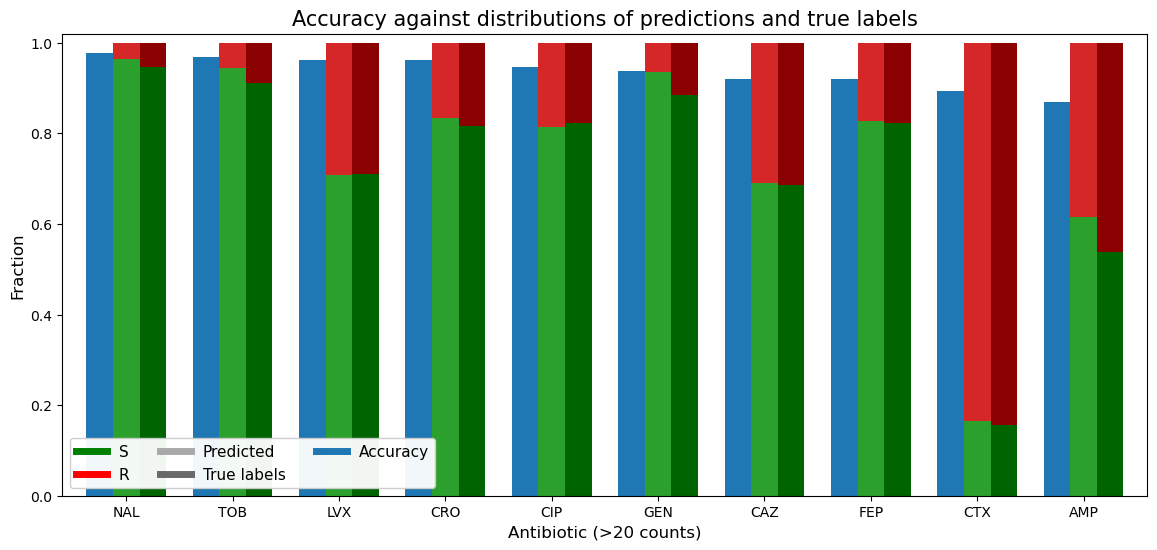

In [94]:
ab_stats = results_naive['val_ab_stats']
ab_stats.set_index('antibiotic', inplace=True)
sorted_ab_stats = ab_stats[ab_stats['num_tot'] > 20]
sorted_ab_stats = sorted_ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (>20 counts)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

Compare naive and pre-trained

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2087704553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2087704553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2087704553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

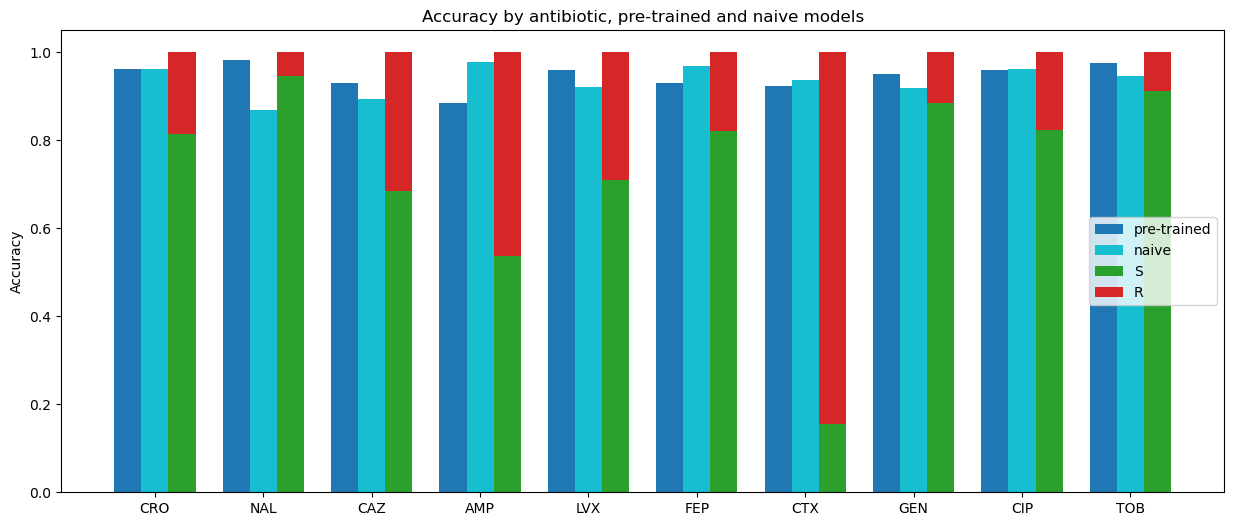

In [95]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['accuracy'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['accuracy'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Accuracy by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

Compare for sensitivity, specificity and F1

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\3348240359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\3348240359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\3348240359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

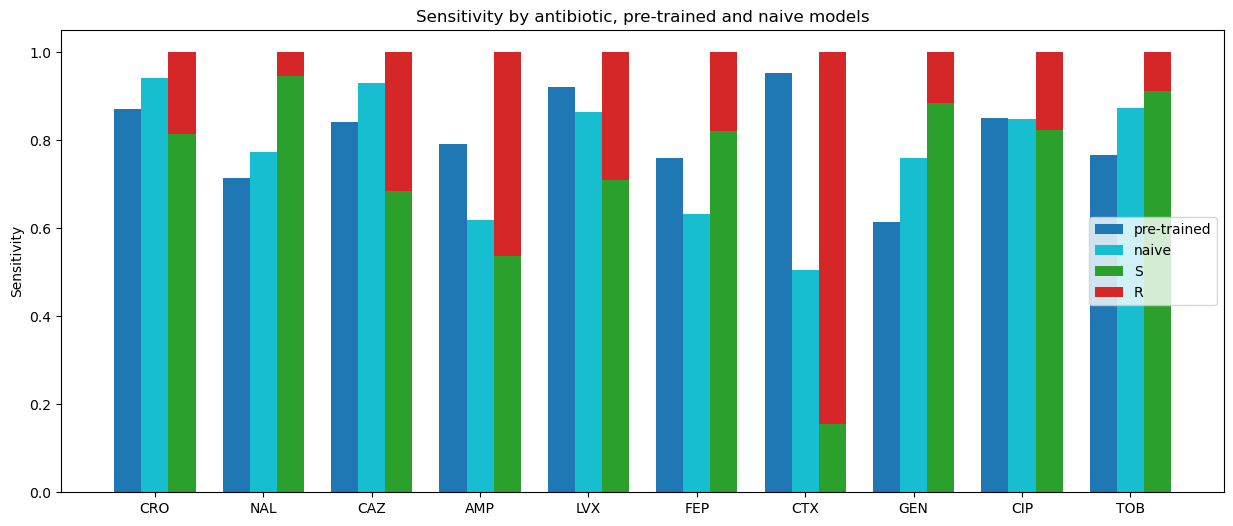

In [96]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['sensitivity'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['sensitivity'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Sensitivity by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Sensitivity')
plt.legend(loc='center right')
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2259624284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2259624284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\2259624284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

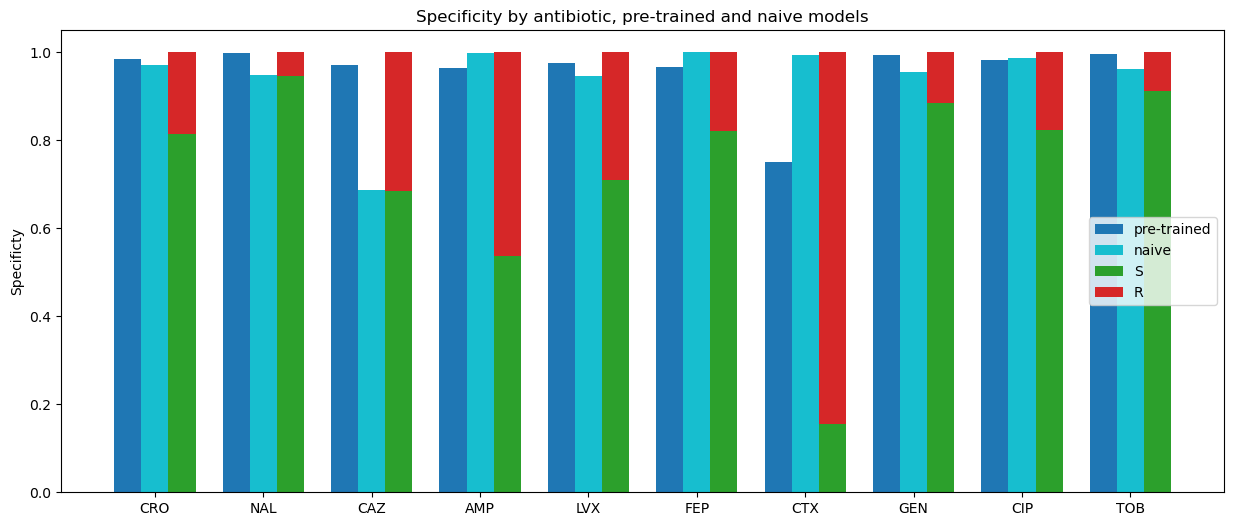

In [97]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['specificity'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['specificity'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('Specificity by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('Specificty')
plt.legend(loc='center right')
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\1147329750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\1147329750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
C:\Users\jespe\AppData\Local\Temp\ipykernel_20840\1147329750.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

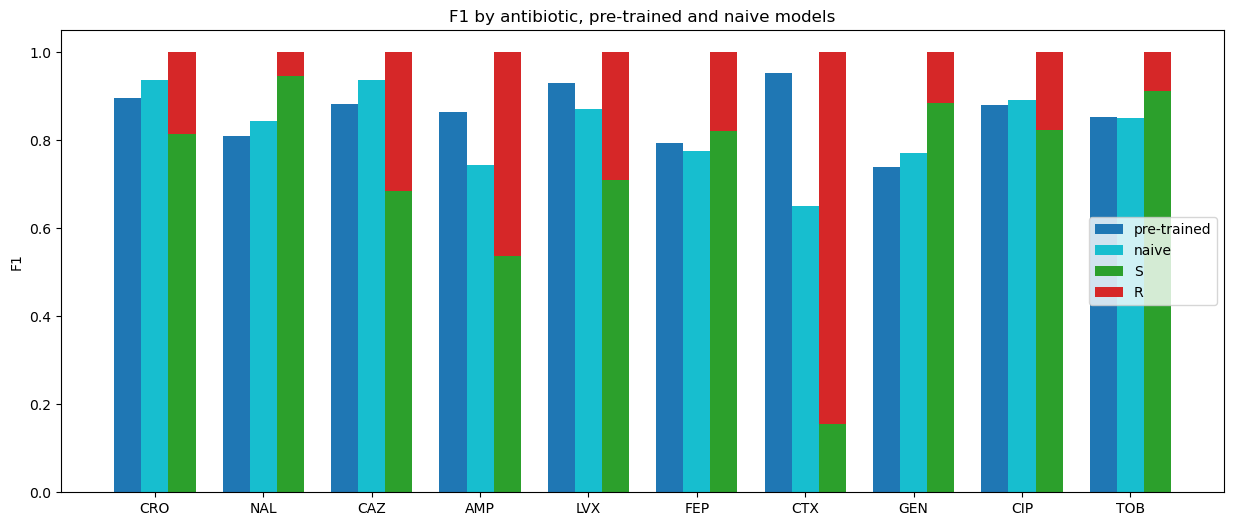

In [98]:
ab_stats_pt = results_hardPT['val_ab_stats']
ab_stats_pt = ab_stats_pt[ab_stats_pt['num_tot'] > 20]
ab_stats_pt['S_frac'] = ab_stats_pt['num_S'] / ab_stats_pt['num_tot']
ab_stats_pt['R_frac'] = ab_stats_pt['num_R'] / ab_stats_pt['num_tot']
ab_stats_naive = results_naive['val_ab_stats']
ab_stats_naive = ab_stats_naive[ab_stats_naive['num_tot'] > 20]
ab_stats_naive['S_frac'] = ab_stats_naive['num_S'] / ab_stats_naive['num_tot']
ab_stats_naive['R_frac'] = ab_stats_naive['num_R'] / ab_stats_naive['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
ind = np.arange(len(ab_stats_pt))
bar_width = 0.25
ax.bar(ind - bar_width, ab_stats_pt['F1'], bar_width, color='tab:blue', label='pre-trained')
ax.bar(ind, ab_stats_naive['F1'], bar_width, color='tab:cyan', label='naive')
ax.bar(ind + bar_width, ab_stats_pt['S_frac'], bar_width, color='tab:green', label='S')
ax.bar(ind + bar_width, ab_stats_pt['R_frac'], bar_width, bottom=ab_stats_pt['S_frac'], color='tab:red', label='R')

ax.set_title('F1 by antibiotic, pre-trained and naive models')
ax.set_xticks(ind, ab_stats_pt.index)
plt.ylabel('F1')
plt.legend(loc='center right')
plt.show()